In [2]:
#project
#approximate cost of a person's health insurance
#gerekli kitaplıkları içeri aktarıyorum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
#kaggle'dan bulduğum sağlık sigortası başlıklı veri kümesini yüklüyorum
#verimizin bozulmaması için verimizi yeniden adlandırıyorum
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df[['age']]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [14]:
#hangi değerin kaç veri örneğine sahip olduğuna bakıyorum
df['age'].value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [17]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

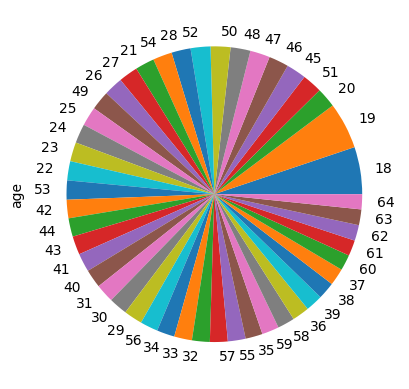

In [21]:
#görselleştirme yapıyorum
df['age'].value_counts().plot.pie();

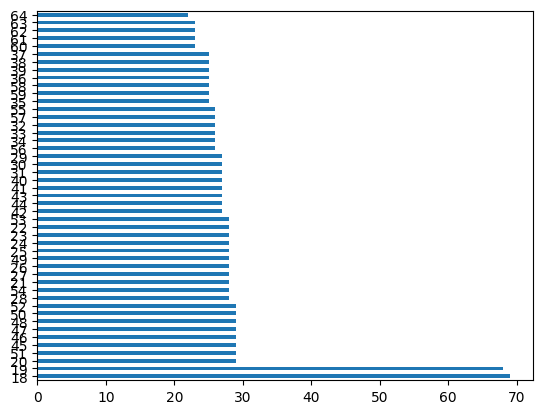

In [22]:
df['age'].value_counts().plot.barh();

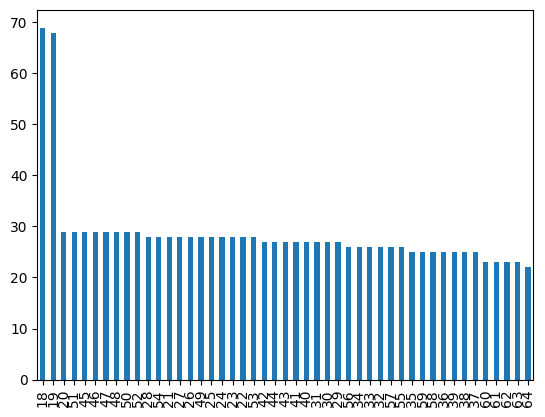

In [24]:
df['age'].value_counts().plot.bar();

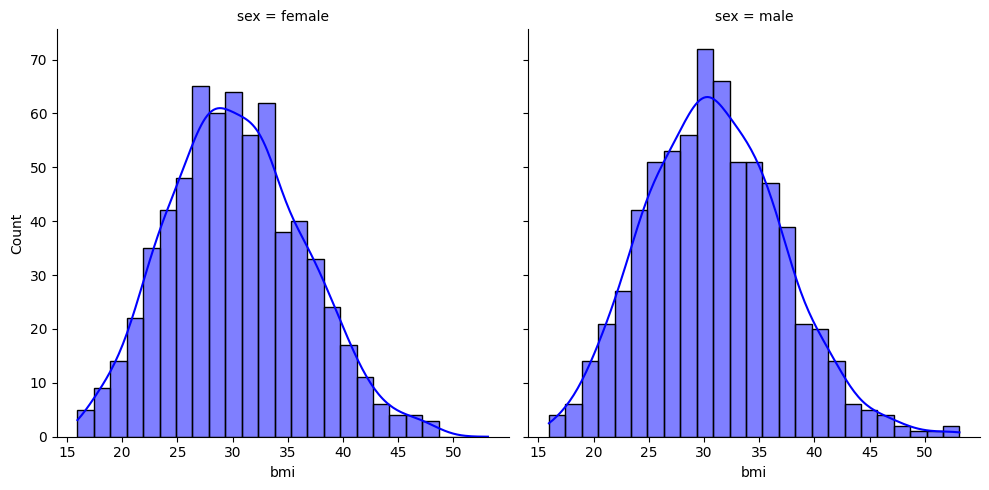

In [25]:
#veriler arasındaki ilişkiyi inceliyorum
#bmi ve sex arasındaki ilişki
sns.displot(data=insurance, x="bmi", col="sex",kde=True, color='b' )


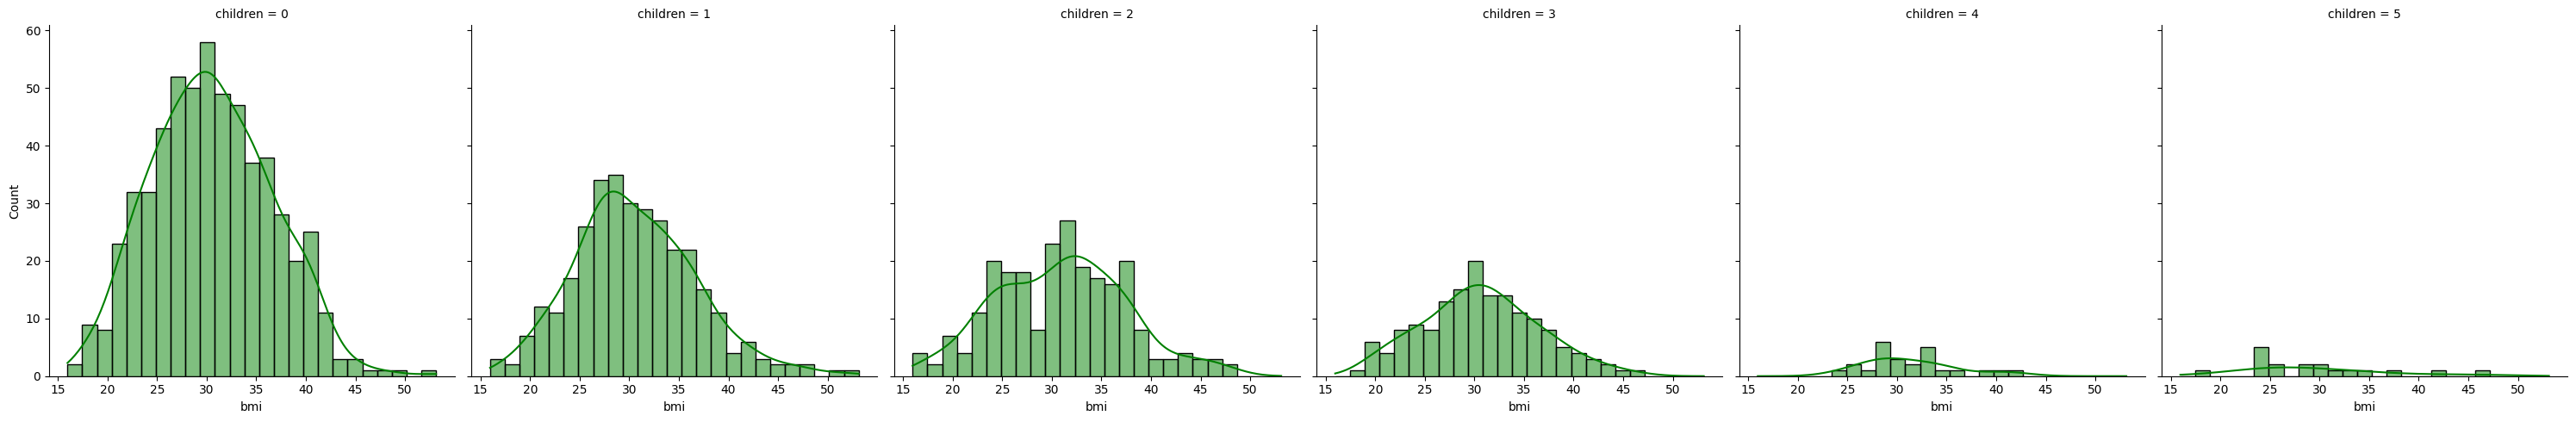

In [26]:
sns.displot(data=insurance, x="bmi", col="children",kde=True, color='g' )

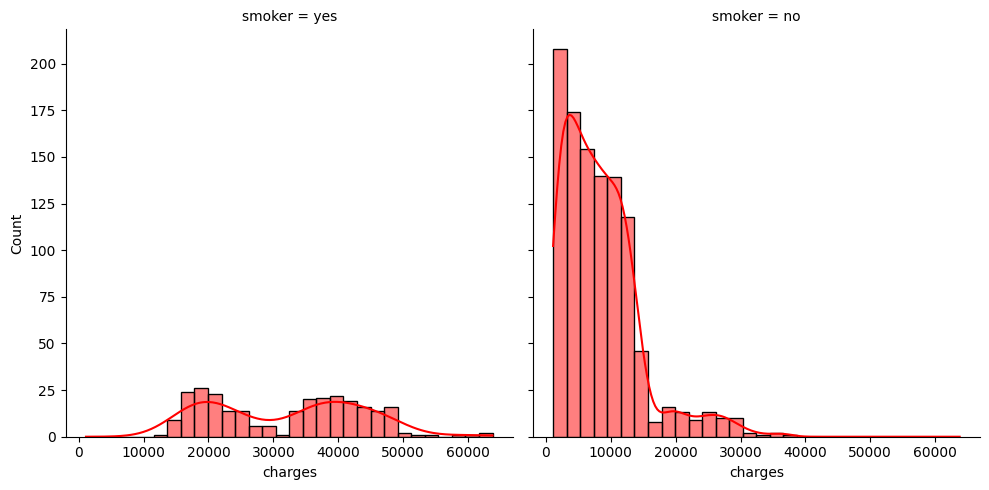

In [27]:
#charges ve smoker araasındaki ilişki
sns.displot(data=insurance, x="charges", col="smoker",kde=True, color='r' )

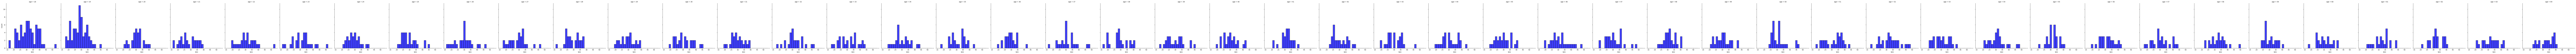

In [28]:
sns.displot(data=insurance, x="bmi", col="age",kde=False, color='b' )

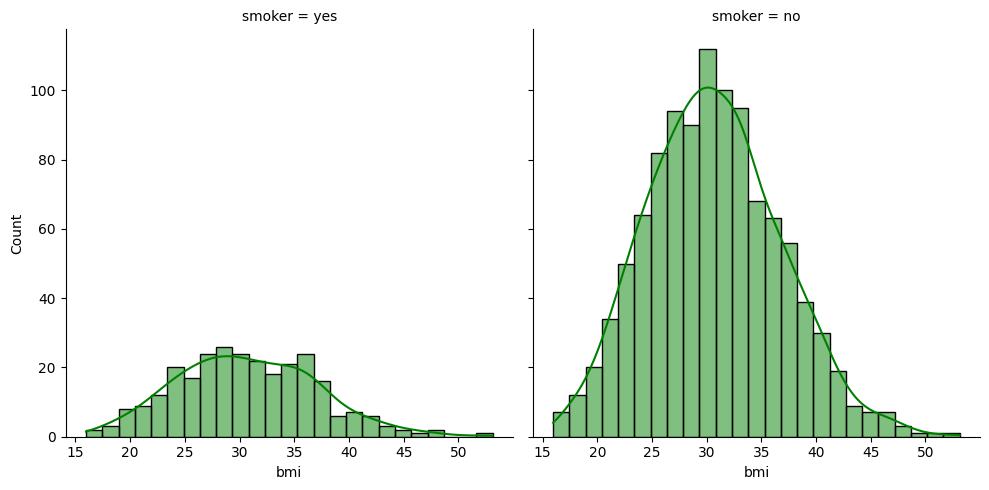

In [29]:
#bmi ve smoker arsasındaki ilişki
sns.displot(data=insurance, x="bmi", col="smoker",kde=True, color='g' )

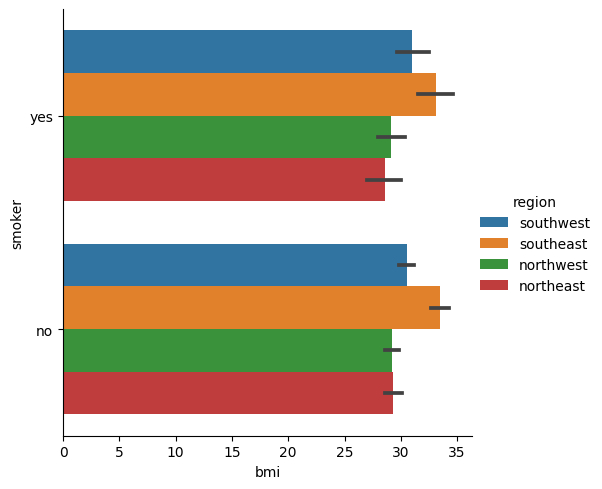

In [30]:
#“region”, “smoker” ve “bmi” arasındaki ilişki
sns.catplot(data=df, x="bmi", y="smoker", hue="region", kind="bar")

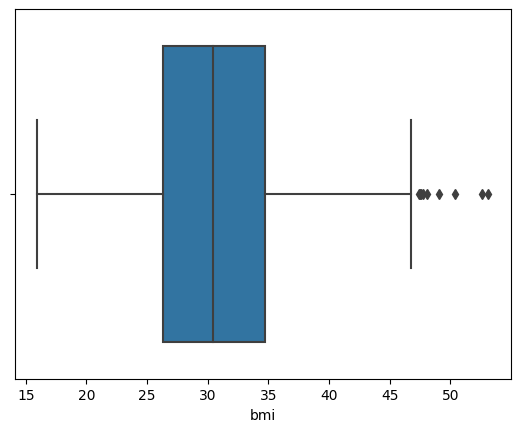

In [31]:
# bmi değerinde aykırı değişken var mı sorusu için boxplot yapıyorum
import seaborn as sns
sns.boxplot(x= "bmi", data=df);

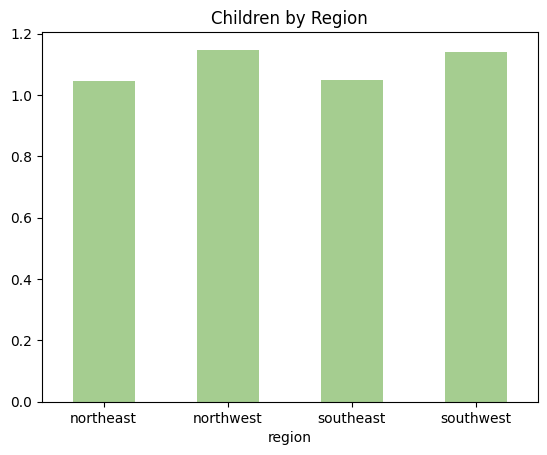

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64

In [32]:
#en çok çocuk olan bölgeye bakıyorum
#en çok çocuk olan bölge northwest (kuzeybatı)
region_=insurance.groupby('region').children.mean().plot(kind='bar', colormap='crest', title="Children by Region")
for item in region_.get_xticklabels():
    item.set_rotation(0)
plt.show()
insurance.groupby('region').children.mean()

In [34]:
df["smoker"] = df["smoker"].replace(["yes","no"], [1,0])
df["sex"] = df["sex"].replace(["male","female"], [1,0])

In [36]:
y = df['region']
X = df.drop(['region'], axis= 1)

In [44]:
#Veri kümesini normalleştirerek Min-Maks Ölçeklendirme
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
#Veri kümesini X_train,X_test, y_train, y_test olarak bölüyorum
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [45]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler(X_train)
scaler


MinMaxScaler(feature_range=     age  sex    bmi  children  smoker      charges
472   19    0  29.80         0       0   1744.46500
39    60    1  39.90         0       1  48173.36100
661   57    0  23.98         1       0  22192.43711
1234  45    0  27.83         2       0   8515.75870
593   21    0  21.85         1       1  15359.10450
...   ..  ...    ...       ...     ...          ...
573   62    0  36.86         1       0  31620.00106
2     28    1  33.00         3       0   4449.46200
1262  41    0  28.05         1       0   6770.19250
64    20    0  22.42         0       1  14711.74380
175   63    0  37.70         0       1  48824.45000

[1070 rows x 6 columns])

In [46]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler(y_train)
scaler

MinMaxScaler(feature_range=79      northwest
363     southwest
284     southwest
19      southwest
646     northwest
          ...    
1323    southeast
714     southwest
1046    northeast
671     northeast
604     northwest
Name: region, Length: 1070, dtype: object)

In [47]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler(X_test)
scaler

MinMaxScaler(feature_range=     age  sex     bmi  children  smoker      charges
1292  21    1  23.210         0       0   1515.34490
131   61    0  22.040         0       0  13616.35860
771   53    0  26.700         2       0  11150.78000
323   57    1  40.945         0       0  11566.30055
1033  18    1  21.565         0       1  13747.87235
...   ..  ...     ...       ...     ...          ...
544   54    1  30.210         0       0  10231.49990
124   47    0  33.915         3       0  10115.00885
695   26    0  40.185         0       0   3201.24515
1025  21    0  34.600         0       0   2020.17700
607   59    0  23.655         0       1  25678.77845

[268 rows x 6 columns])

In [48]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler(y_test)
scaler

MinMaxScaler(feature_range=280     northeast
578     southwest
259     northwest
410     northwest
867     southwest
          ...    
138     southeast
83      northwest
875     northwest
1115    southeast
654     southeast
Name: region, Length: 268, dtype: object)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model_1 = LogisticRegression(max_iter=200)

In [40]:
#modeli oluşturuyorum
model_1.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [49]:
#çarpraz doğrulama
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [50]:
df = pd.read_csv('insurance.csv')

In [51]:
X = df.drop(columns=['charges'])
y = df['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10)

In [53]:
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])

In [55]:
sex_mapping = {'male': 0, 'female': 1}
X['sex'] = X['sex'].map(sex_mapping)

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['smoker'] = label_encoder.fit_transform(X['smoker'])

smoker_mapping = {'male': 0, 'female': 1}
X['smoker'] = X['smoker'].map(smoker_mapping)

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['region'] = label_encoder.fit_transform(X['region'])
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
X['region'] = X['region'].map(region_mapping)


In [58]:
from sklearn.preprocessing import LabelEncoder

# "sex" sütununu dönüştür
sex_encoder = LabelEncoder()
X['sex'] = sex_encoder.fit_transform(X['sex'])

# "smoker" sütununu dönüştür
smoker_encoder = LabelEncoder()
X['smoker'] = smoker_encoder.fit_transform(X['smoker'])

# "region" sütununu dönüştür
region_encoder = LabelEncoder()
X['region'] = region_encoder.fit_transform(X['region'])


In [59]:
from sklearn.impute import SimpleImputer

# NaN değerleri sütun ortalaması ile doldur
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Linear Regression modelini oluştur
model = LinearRegression()

# Çapraz Doğrulama ile Performans Değerlendirme
scores = cross_val_score(model, X_imputed, y, cv=5)

scores


array([0.11565999, 0.13046673, 0.11277189, 0.13899117, 0.08780891])

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score

df = pd.read_csv("insurance.csv")
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['age', 'bmi', 'children']
numeric_transformer = StandardScaler()

categorical_features = ['sex', 'smoker', 'region']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

linear_regression_model = LinearRegression()


linear_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('model', linear_regression_model)])


# Verileri çapraz doğrulama ile değerlendiriyorum
def evaluate_model(pipeline, X_train, y_train):
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    return scores

# Linear Regression performans değerlendirmesi
linear_regression_scores = evaluate_model(linear_regression_pipeline, X_train, y_train)
print("Linear Regression Cross-validation Scores:")
print(linear_regression_scores)



Linear Regression Cross-validation Scores:
[0.71585461 0.80210564 0.72296123 0.65784333 0.76678575]


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'bmi', 'children']
numeric_transformer = StandardScaler()

categorical_features = ['sex', 'smoker', 'region']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model ve parametreleri oluşturuyorum
model = LinearRegression()
parameters = { 'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'model__n_jobs': [-1, 1, 2]}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Parameters: {'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': -1}
Best Score: 0.7331101109097584


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

scores = cross_val_score(model, X_imputed, y, cv=5)
mean_score = scores.mean()

for fold_idx, score in enumerate(scores):
    print(f"Fold {fold_idx+1} - Score: {score}")

# Ortalama skor değerini hesaplıyorum
print(f"Average Score: {mean_score}")


Fold 1 - Score: 0.11565999460555898
Fold 2 - Score: 0.13046673369328343
Fold 3 - Score: 0.11277189299938861
Fold 4 - Score: 0.13899117241489756
Fold 5 - Score: 0.08780890513457196
Average Score: 0.1171397397695401


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

df = pd.read_csv("insurance.csv")

X = df.drop("charges", axis=1)
y = df["charges"]

X = pd.get_dummies(X, columns=["sex", "smoker", "region"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modeli
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search veya Randomized Search kullanarak hiperparametre optimizasyonu
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve modeli seçmek için
best_model = random_search.best_estimator_

# Test verisi ile tahmin yapmak
y_pred = best_model.predict(X_test)

# MSE ve MAE değerlerine bakıyorum ve en düşük bulabildiğim değerler
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("En iyi hiperparametreler:", random_search.best_params_)
print("Ortalama Karesel Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)


En iyi hiperparametreler: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Ortalama Karesel Hata (MSE): 19017644.63325899
Ortalama Mutlak Hata (MAE): 2478.8677015407707
